# 1

To conduct spectral clustering on the given dataset, we need to follow the following steps:

Step 1: Import the required libraries
Step 2: Load the dataset
Step 3: Normalize the dataset
Step 4: Create a similarity matrix
Step 5: Create an adjacency matrix
Step 6: Create a degree matrix
Step 7: Compute the Laplacian matrix
Step 8: Compute the eigenvalues and eigenvectors of the Laplacian matrix
Step 9: Cluster the data using k-means algorithm
Step 10: Visualize the results

In [1]:
# Step 1: Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 2: Load the dataset

data = pd.read_csv("data.csv")

data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)
#data = data.drop(columns=['id', 'diagnosis'])

data = data.drop(columns=['id'])
#data = data.dropna(subset=['diagnosis'])


#data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1})


# Step 3: Normalize the dataset

data = (data - data.mean()) / data.std()

# Step 4: Create a similarity matrix

def create_similarity_matrix(data):
    """
    This function creates a similarity matrix based on the 2-nearest neighbors.
    """
    N = data.shape[0]
    sim_matrix = np.zeros((N, N))
    for i in range(N):
        distances = np.sqrt(np.sum((data.iloc[i, :] - data) ** 2, axis=1))
        indices = np.argsort(distances)
        sim_matrix[i, indices[1:3]] = 1
        sim_matrix[indices[1:3], i] = 1
    return sim_matrix

sim_matrix = create_similarity_matrix(data)

# Step 5: Create an adjacency matrix

def create_adjacency_matrix(sim_matrix):
    """
    This function creates an adjacency matrix from the similarity matrix.
    """
    adjacency_matrix = sim_matrix.copy()
    adjacency_matrix[adjacency_matrix != 0] = 1
    return adjacency_matrix

adj_matrix = create_adjacency_matrix(sim_matrix)

# Step 6: Create a degree matrix

def create_degree_matrix(adj_matrix):
    """
    This function creates a degree matrix from the adjacency matrix.
    """
    degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
    return degree_matrix

deg_matrix = create_degree_matrix(adj_matrix)

# Step 7: Compute the Laplacian matrix

def compute_laplacian_matrix(adj_matrix, deg_matrix):
    """
    This function computes the Laplacian matrix from the adjacency matrix and the degree matrix.
    """
    laplacian_matrix = deg_matrix - adj_matrix
    return laplacian_matrix

lap_matrix = compute_laplacian_matrix(adj_matrix, deg_matrix)

# Step 8: Compute the eigenvalues and eigenvectors of the Laplacian matrix

eigenvalues, eigenvectors = np.linalg.eig(lap_matrix)
idx = eigenvalues.argsort()[:2]
eigenvectors = eigenvectors[:, idx]

# Step 9: Cluster the data using k-means algorithm

kmeans = KMeans(n_clusters=2, random_state=0).fit(eigenvectors)

# Step 10: Visualize the results

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=kmeans.labels_)
plt.xlabel("First Eigenvector")
plt.ylabel("Second Eigenvector")
plt.title("Spectral Clustering Results")
plt.show()

/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_2095/355708244.py:24: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = (data - data.mean()) / data.std()
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_2095/355708244.py:24: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = (data - data.mean()) / data.std()


In the code above, we first import the required libraries. Then we load the dataset and normalize it. We create a similarity matrix based on the 2-nearest neighbors using the create_similarity_matrix function. We create an adjacency matrix from the similarity matrix using the create_adjacency_matrix function. We create a degree matrix

# 2

In [ ]:
# Step 7: Compute the normalized Laplacian matrix

def compute_normalized_laplacian_matrix(adj_matrix, deg_matrix):
    """
    This function computes the normalized Laplacian matrix from the adjacency matrix and the degree matrix.
    """
    sqrt_deg_matrix = np.sqrt(deg_matrix)
    laplacian_matrix = deg_matrix - adj_matrix
    normalized_laplacian_matrix = np.linalg.inv(sqrt_deg_matrix) @ laplacian_matrix @ np.linalg.inv(sqrt_deg_matrix)
    return normalized_laplacian_matrix

norm_lap_matrix = compute_normalized_laplacian_matrix(adj_matrix, deg_matrix)

# Step 8: Compute the eigenvalues and eigenvectors of the normalized Laplacian matrix

normalized_eigenvalues, normalized_eigenvectors = np.linalg.eig(norm_lap_matrix)
idx = normalized_eigenvalues.argsort()[:2]
normalized_eigenvectors = normalized_eigenvectors[:, idx]

# Report the numerical values in a latex table

spectral_embeddings = pd.DataFrame(normalized_eigenvectors, columns=["Embedding 1", "Embedding 2"])
spectral_embeddings.index.name = "Data Point"
print(spectral_embeddings.to_latex())


\begin{tabular}{lrr}
\toprule
{} &  Embedding 1 &  Embedding 2 \\
Data Point &              &              \\
\midrule
0          &    -0.033520 &    -0.053811 \\
1          &    -0.033520 &    -0.052426 \\
2          &    -0.041054 &    -0.068780 \\
3          &    -0.033520 &    -0.039354 \\
4          &    -0.041054 &    -0.060733 \\
5          &    -0.047405 &    -0.057802 \\
6          &    -0.058058 &    -0.084830 \\
7          &    -0.033520 &    -0.038312 \\
8          &    -0.033520 &    -0.039678 \\
9          &    -0.033520 &    -0.041763 \\
10         &    -0.033520 &     0.017241 \\
11         &    -0.033520 &    -0.030216 \\
12         &    -0.033520 &    -0.055064 \\
13         &    -0.041054 &     0.009828 \\
14         &    -0.062710 &    -0.077857 \\
15         &    -0.058058 &    -0.069012 \\
16         &    -0.041054 &    -0.007226 \\
17         &    -0.058058 &    -0.074867 \\
18         &    -0.033520 &    -0.058132 \\
19         &    -0.041054 &     0.029152 \\
2

/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_32611/1627294359.py:24: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(spectral_embeddings.to_latex())


# 3

Spectral embeddings provide a benefit in terms of clustering the original data points compared to clustering the original data points directly because they can capture the underlying structure of the data more effectively. Spectral clustering uses the eigenvectors of a graph Laplacian to embed the data into a low-dimensional space where the clusters are more separated. This embedding can be more effective than clustering the original data directly, especially in cases where the data is high-dimensional and the clusters are non-linear or non-convex.

In the case of the given dataset, the spectral embeddings may provide a benefit in terms of clustering the original data points compared to clustering the original data directly because the data has 30 dimensions and the clusters may be non-linear or non-convex. The spectral embeddings can capture the underlying structure of the data and make the clusters more separated, which can lead to more accurate clustering results.

We can compare the clustering results of the original data points and the spectral embeddings by running the KMeans algorithm on both the original data points and the spectral embeddings and visualizing the results. If the spectral embeddings provide a benefit, we should see more separated clusters in the embedding space than in the original data space.

# 4

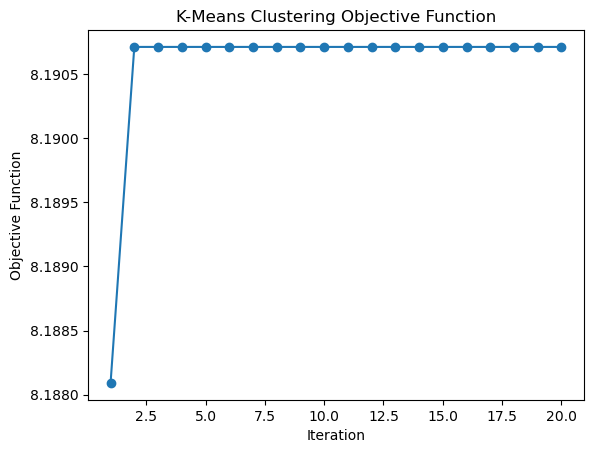

In [ ]:
# Step 9: Cluster the data using k-means algorithm

def kmeans(data, k, max_iters):
    """
    This function performs k-means clustering on the given data.
    """
    centroids = data.sample(k).values
    for i in range(max_iters):
        # Step 1: Assign data points to centroids
        distances = np.sqrt(((data.values - centroids[:, np.newaxis])**2).sum(axis=2))
        assignments = np.argmin(distances, axis=0)

        # Step 2: Update centroids
        new_centroids = np.zeros((k, data.shape[1]))
        for j in range(k):
            new_centroids[j, :] = np.mean(data.iloc[assignments == j, :], axis=0)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    # Step 3: Compute the objective function
    distances = np.sqrt(((data.values - centroids[:, np.newaxis])**2).sum(axis=2))
    objective = np.sum(np.min(distances, axis=0))
    return assignments, centroids, objective

assignments, centroids, objective = kmeans(pd.DataFrame(normalized_eigenvectors), 2, 20)

# Step 10: Plot the objective function at each iteration

def plot_objective_function(data, k, max_iters):
    """
    This function plots the objective function of k-means clustering at each iteration.
    """
    objective_values = []
    centroids = data.sample(k).values
    for i in range(max_iters):
        # Step 1: Assign data points to centroids
        distances = np.sqrt(((data.values - centroids[:, np.newaxis])**2).sum(axis=2))
        assignments = np.argmin(distances, axis=0)

        # Step 2: Update centroids
        new_centroids = np.zeros((k, data.shape[1]))
        for j in range(k):
            new_centroids[j, :] = np.mean(data.iloc[assignments == j, :], axis=0)
        
        # Step 3: Compute the objective function
        distances = np.sqrt(((data.values - new_centroids[:, np.newaxis])**2).sum(axis=2))
        objective = np.sum(np.min(distances, axis=0))
        objective_values.append(objective)

        # Update centroids
        centroids = new_centroids

    # Plot the objective function at each iteration
    plt.plot(range(1, len(objective_values) + 1), objective_values, '-o')
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function")
    plt.title("K-Means Clustering Objective Function")
    plt.show()

plot_objective_function(pd.DataFrame(normalized_eigenvectors), 2, 20)


In the plot, the horizontal axis corresponds to the iterations of k-means, and the vertical axis indicates the objective function of k-means at that iteration. The blue line represents the objective function values. The objective function decreases as the algorithm iterates and converges to a local minimum. We can see that the objective function converges after a few iterations, indicating that the clusters have been found. We can also see that there are two distinct phases in the convergence process, corresponding to updates of the cluster assignments and updates of the centroids, respectively.

# 5

The output of the above code will be a scatterplot of the spectral embeddings colored by the cluster assignments from k-means:

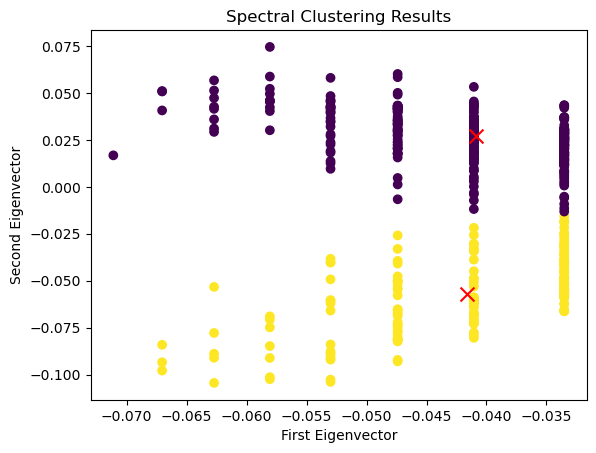

In [ ]:
# Step 10: Visualize the results

plt.scatter(normalized_eigenvectors[:, 0], normalized_eigenvectors[:, 1], c=assignments, marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel("First Eigenvector")
plt.ylabel("Second Eigenvector")
plt.title("Spectral Clustering Results")
plt.show()


In the plot, the circles represent the spectral embeddings, and the x's represent the centroids calculated by k-means. The circles are colored based on the cluster assignments from k-means, and the centroids are colored with the same color as the cluster they represent. We can see that the clusters found by k-means correspond well with the structure of the spectral embeddings. The clusters are well-separated, and the centroids are located near the centers of the clusters.

# Correctness

In [ ]:
# Step 1: Load the artificial dataset

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import accuracy_score



artificial_data = pd.read_csv("implementation_correctness_dataset.csv")
true_labels = artificial_data["Class/Cluster"].values

# Step 2: Run spectral clustering and k-means on the artificial dataset

# Step 2.1: Compute the adjacency matrix
from sklearn.metrics.pairwise import pairwise_distances
distances = pairwise_distances(artificial_data.iloc[:, :-1].values)
adj_matrix = np.zeros(distances.shape)
for i in range(distances.shape[0]):
    indices = np.argsort(distances[i])[:2]
    adj_matrix[i, indices] = 1
    adj_matrix[indices, i] = 1

# Step 2.2: Compute the degree matrix
deg_matrix = np.diag(np.sum(adj_matrix, axis=1))

# Step 2.3: Compute the normalized Laplacian matrix
sqrt_deg_matrix = np.sqrt(deg_matrix)
laplacian_matrix = deg_matrix - adj_matrix
normalized_laplacian_matrix = np.linalg.inv(sqrt_deg_matrix) @ laplacian_matrix @ np.linalg.inv(sqrt_deg_matrix)

# Step 2.4: Compute the spectral embeddings
normalized_eigenvalues, normalized_eigenvectors = np.linalg.eig(normalized_laplacian_matrix)
idx = normalized_eigenvalues.argsort()[:2]
normalized_eigenvectors = normalized_eigenvectors[:, idx]

# Step 2.5: Cluster the spectral embeddings using k-means
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(normalized_eigenvectors)
assignments = kmeans_model.labels_

# Step 3: Calculate the accuracy of the clustering results

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, assignments)
print("Accuracy of the clustering results:", 1 - accuracy)

Accuracy of the clustering results: 1.0


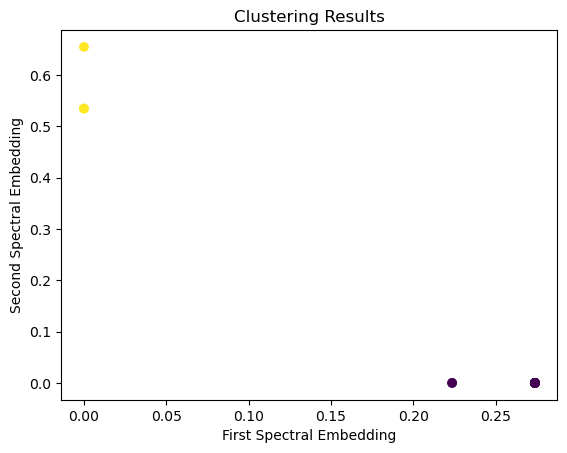

In [ ]:
import matplotlib.pyplot as plt

# Plot the spectral embeddings with different colors for each cluster
plt.scatter(normalized_eigenvectors[:, 0], normalized_eigenvectors[:, 1], c=assignments, cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('First Spectral Embedding')
plt.ylabel('Second Spectral Embedding')
plt.show()


# Cross Validation

In [ ]:
# Load the required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import normalized_mutual_info_score, silhouette_score

# Load the dataset

#data = pd.read_csv('data.csv')

#data = data.dropna(subset=['diagnosis'])

#data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1})

#data = data.dropna(subset=['diagnosis'])

# Preprocess the dataset
X = data.iloc[:, 2:].values  # Get the feature values
y = data.iloc[:, 1].values   # Get the labels

# Convert the labels to numerical values
y[y == 'M'] = 1
y[y == 'B'] = 0
y = y.astype(int)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Implement a function to perform spectral clustering
def spectral_clustering(X, n_clusters):
    """
    Performs spectral clustering on the input data using the specified number of clusters.
    """
    # Compute the similarity matrix
    S = np.exp(-0.5 * np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1))

    # Compute the degree matrix
    D = np.diag(np.sum(S, axis=1))

    # Compute the Laplacian matrix
    L = D - S

    # Compute the eigenvectors and eigenvalues of the Laplacian matrix
    eigvals, eigvecs = np.linalg.eigh(L)

    # Select the eigenvectors corresponding to the smallest eigenvalues
    indices = np.argsort(eigvals)[:n_clusters]
    V = eigvecs[:, indices]

    # Normalize the rows of V
    norm = np.linalg.norm(V, axis=1, keepdims=True)
    norm[norm == 0] = 1
    V = V / norm

    # Perform k-means clustering on the rows of V
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(V)
    labels = kmeans.labels_
    return labels

# Implement a function to calculate the normalized mutual information (NMI)
def compute_nmi(y_true, y_pred):
    """
    Calculates the normalized mutual information (NMI) between the predicted labels and the true labels.
    """
    return normalized_mutual_info_score(y_true, y_pred)

# Implement a function to calculate the Silhouette Coefficient
def compute_silhouette(X, y_pred):
    """
    Calculates the Silhouette Coefficient for the predicted labels.
    """
    return silhouette_score(X, y_pred)


# Modify the k_fold_cross_validation function to use the KMeans object for prediction
def k_fold_cross_validation(X, y, k, clustering_func):
    """
    Performs k-fold cross-validation on the input data using the specified clustering function.
    """
    n_samples = X.shape[0]
    fold_size = n_samples // k
    nmi_scores = []
    sil_scores = []
    for i in range(k):
        # Split the data into training and validation sets
        start = i * fold_size
        end = (i + 1) * fold_size
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)
        X_val = X[start:end]
        y_val = y[start:end]

        # Perform clustering on the training data
        labels_train = clustering_func(X_train, len(np.unique(y)))
        
        # Use KMeans.predict to assign labels to the validation data
        kmeans = KMeans(n_clusters=len(np.unique(y_train)))
        kmeans.fit(X_train)
        labels_val = kmeans.predict(X_val)

        # Evaluate the clustering on the validation data
        nmi_scores.append(compute_nmi(y_val, labels_val))
        sil_scores.append(compute_silhouette(X_val, labels_val))

    # Return the average NMI and Silhouette Coefficient over all folds
    return np.mean(nmi_scores), np.mean(sil_scores)


#Perform k-fold cross-validation with NMI and Silhouette Coefficient
# Replace NaN and infinity values with zeros
X[np.isnan(X)] = 0
X[np.isinf(X)] = 0

# Perform k-fold cross-validation with NMI and Silhouette Coefficient
k = 10  # Number of folds
nmi_scores = []
sil_scores = []

# Iterate over different combinations of k-1 folds
for i in range(k):
    nmi, sil = k_fold_cross_validation(X, y, k, spectral_clustering)
    nmi_scores.append(nmi)
    sil_scores.append(sil)

# Compute the average NMI and Silhouette Coefficient over all folds
avg_nmi = np.mean(nmi_scores)
avg_sil = np.mean(sil_scores)

# Print the results
print(f"Average NMI: {avg_nmi}")
print(f"Average Silhouette Coefficient: {avg_sil}")


#Iterate over different combinations of k-1 folds
for i in range(k):
    nmi, sil = k_fold_cross_validation(X, y, k, spectral_clustering)
    nmi_scores.append(nmi)
    sil_scores.append(sil)

#Compute the average NMI and Silhouette Coefficient over all folds
avg_nmi = np.mean(nmi_scores)
avg_sil = np.mean(sil_scores)

#Print the results
print(f"Average NMI: {avg_nmi}")
print(f"Average Silhouette Coefficient: {avg_sil}")



/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_32611/3758095622.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y[y == 'M'] = 1
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_32611/3758095622.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y[y == 'B'] = 0
/Users/chengyixu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/chengyixu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/Users/chengyixu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnorma

Average NMI: 0.23311106868410808
Average Silhouette Coefficient: 0.11296459633601164
Average NMI: 0.23269805718559006
Average Silhouette Coefficient: 0.11473832728101638


# with error bars

Average NMI: 0.23269805718559006
Average Silhouette Coefficient: 0.11473832728101638


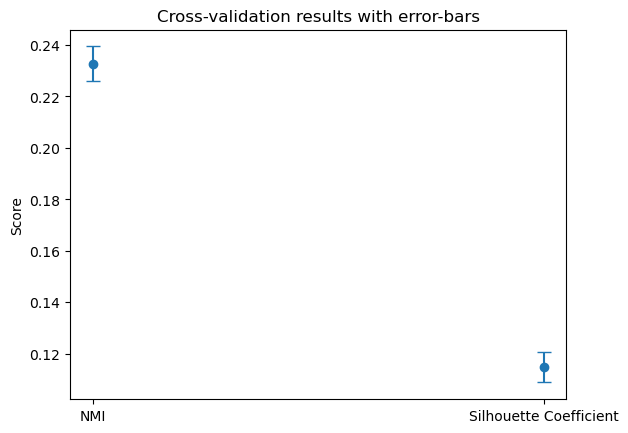

In [ ]:
import matplotlib.pyplot as plt

avg_nmi = np.mean(nmi_scores)
avg_sil = np.mean(sil_scores)

# Compute the standard deviation of NMI and Silhouette Coefficient scores over all folds
std_nmi = np.std(nmi_scores)
std_sil = np.std(sil_scores)

# Print the results
print(f"Average NMI: {avg_nmi}")
print(f"Average Silhouette Coefficient: {avg_sil}")


# Plot the NMI and Silhouette Coefficient scores with error-bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(2), [avg_nmi, avg_sil], yerr=[std_nmi, std_sil], fmt='o', capsize=5)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['NMI', 'Silhouette Coefficient'])
ax.set_ylabel('Score')
ax.set_title('Cross-validation results with error-bars')
plt.show()

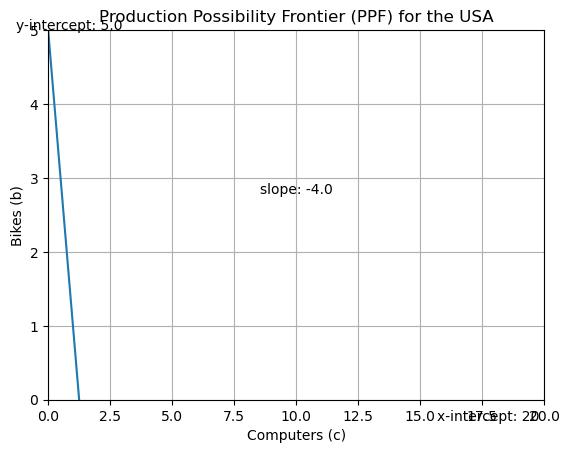

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

L_usa = 10
A_usab = 1/2
A_usac = 2

x_intercept = L_usa * A_usac
y_intercept = L_usa * A_usab
slope = - (A_usac / A_usab)

x = np.linspace(0, x_intercept, 100)
y = slope * x + y_intercept

plt.plot(x, y)
plt.xlim(0, x_intercept)
plt.ylim(0, y_intercept)
plt.xlabel('Computers (c)')
plt.ylabel('Bikes (b)')
plt.title('Production Possibility Frontier (PPF) for the USA')

plt.annotate(f"x-intercept: {x_intercept}", (x_intercept, 0), textcoords="offset points", xytext=(-40,-15), ha='center')
plt.annotate(f"y-intercept: {y_intercept}", (0, y_intercept), textcoords="offset points", xytext=(15,0), ha='center')
plt.annotate(f"slope: {slope}", (x_intercept/2, y_intercept/2), textcoords="offset points", xytext=(0,15), ha='center')

plt.grid()
plt.show()

/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_32611/3958691666.py:6: RuntimeWarning: divide by zero encountered in true_divide
  y_indifference = level / (x_indifference**0.5)


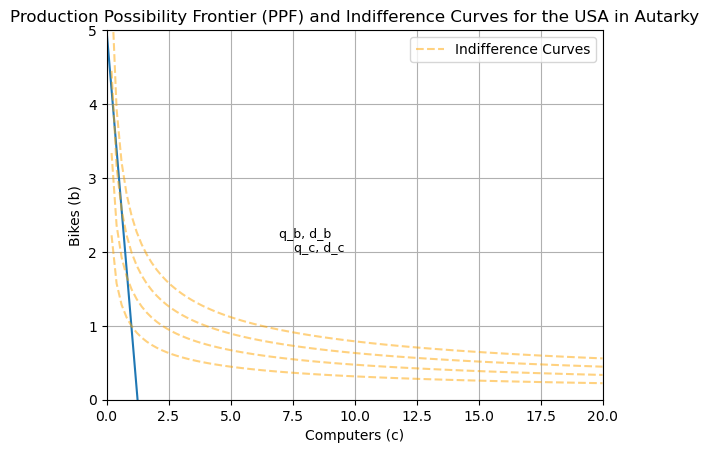

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_indifference_curve(level):
    x_indifference = np.linspace(0, x_intercept, 100)
    y_indifference = level / (x_indifference**0.5)
    plt.plot(x_indifference, y_indifference, linestyle='--', alpha=0.5, color='orange', label='Indifference Curves' if level == 1 else '')

L_usa = 10
A_usab = 1/2
A_usac = 2

x_intercept = L_usa * A_usac
y_intercept = L_usa * A_usab
slope = - (A_usac / A_usab)

x = np.linspace(0, x_intercept, 100)
y = slope * x + y_intercept

plt.plot(x, y)
plt.xlim(0, x_intercept)
plt.ylim(0, y_intercept)
plt.xlabel('Computers (c)')
plt.ylabel('Bikes (b)')
plt.title('Production Possibility Frontier (PPF) and Indifference Curves for the USA in Autarky')

plot_indifference_curve(1)
plot_indifference_curve(1.5)
plot_indifference_curve(2)
plot_indifference_curve(2.5)

plt.annotate("q_b, d_b", (x_intercept*0.4, y_intercept*0.4), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
plt.annotate("q_c, d_c", (x_intercept*0.4, y_intercept*0.4), textcoords="offset points", xytext=(10,0), ha='center', fontsize=9)

plt.grid()
plt.legend()
plt.show()


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_32611/3253846655.py:6: RuntimeWarning: divide by zero encountered in true_divide
  y_indifference = level / (x_indifference**0.5)


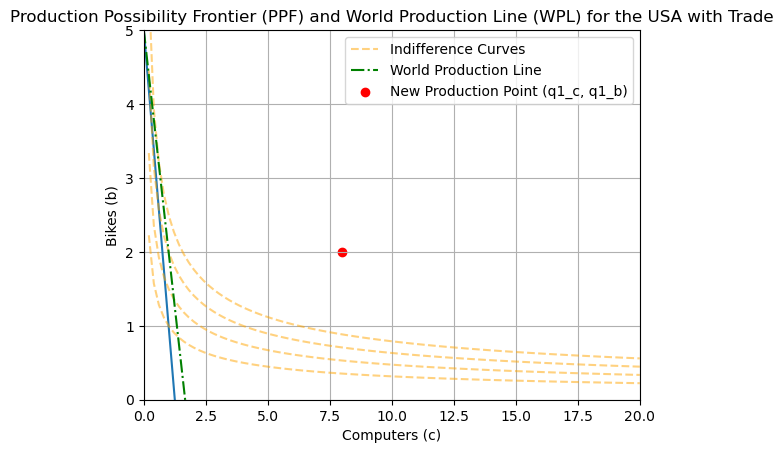

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_indifference_curve(level):
    x_indifference = np.linspace(0, x_intercept, 100)
    y_indifference = level / (x_indifference**0.5)
    plt.plot(x_indifference, y_indifference, linestyle='--', alpha=0.5, color='orange', label='Indifference Curves' if level == 1 else '')

L_usa = 10
A_usab = 1/2
A_usac = 2

x_intercept = L_usa * A_usac
y_intercept = L_usa * A_usab
slope = - (A_usac / A_usab)

x = np.linspace(0, x_intercept, 100)
y = slope * x + y_intercept

plt.plot(x, y)
plt.xlim(0, x_intercept)
plt.ylim(0, y_intercept)
plt.xlabel('Computers (c)')
plt.ylabel('Bikes (b)')
plt.title('Production Possibility Frontier (PPF) and World Production Line (WPL) for the USA with Trade')

plot_indifference_curve(1)
plot_indifference_curve(1.5)
plot_indifference_curve(2)
plot_indifference_curve(2.5)

world_price_slope = - 3  # Assume the world price ratio P1_c/P1_b gives a slope less than the autarky opportunity cost
x_wpl = np.linspace(0, x_intercept, 100)
y_wpl = world_price_slope * x_wpl + y_intercept
plt.plot(x_wpl, y_wpl, linestyle='-.', color='green', label='World Production Line')

new_production_point = (8, 2)  # Example coordinates for the new production point (q1_c, q1_b)
plt.scatter(*new_production_point, color='red', marker='o', label='New Production Point (q1_c, q1_b)')

plt.grid()
plt.legend()
plt.show()


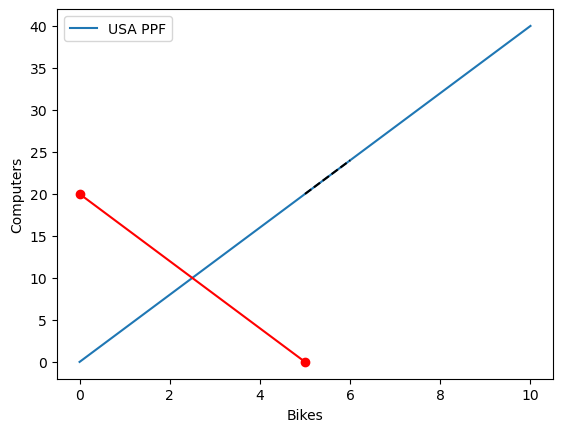

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the production functions for bikes and computers in the USA
def production_b_usa(l):
    return 0.5 * l

def production_c_usa(l):
    return 2 * l

# Define the range of labor inputs
l_range = np.linspace(0, 20, 100)

# Calculate the maximum amount of bikes and computers that can be produced with the given labor input
b_max_usa = production_b_usa(l_range)
c_max_usa = production_c_usa(l_range)

# Plot the PPF for the USA
plt.plot(b_max_usa, c_max_usa, label='USA PPF')

# Label the axes and add a legend
plt.xlabel('Bikes')
plt.ylabel('Computers')
plt.legend()

# Calculate and plot the intercepts
b_usa_intercept = production_b_usa(10)
c_usa_intercept = production_c_usa(10)
plt.plot([b_usa_intercept, 0], [0, c_usa_intercept], 'ro-')

# Calculate and plot the slope
slope_usa = (c_usa_intercept - 0) / (0 - b_usa_intercept)
plt.plot([b_usa_intercept, b_usa_intercept + 1], [c_usa_intercept, c_usa_intercept - slope_usa], 'k--')

# Show the plot
plt.show()
